In [142]:
import pandas as pd

In [143]:
df=pd.read_excel("Titanic.xlsx")

In [144]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [145]:
df.drop(["Name","PassengerId", "SibSp","Parch" , "Ticket","Fare","Cabin" ], inplace=True ,axis=1)

In [146]:
df

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0
...,...,...,...,...,...
886,2,male,27.0,S,0
887,1,female,19.0,S,1
888,3,female,NaN,S,0
889,1,male,26.0,C,1


In [147]:
df.shape

(891, 5)

In [148]:
df.info

<bound method DataFrame.info of      Pclass     Sex   Age Embarked  Survived
0         3    male  22.0        S         0
1         1  female  38.0        C         1
2         3  female  26.0        S         1
3         1  female  35.0        S         1
4         3    male  35.0        S         0
..      ...     ...   ...      ...       ...
886       2    male  27.0        S         0
887       1  female  19.0        S         1
888       3  female   NaN        S         0
889       1    male  26.0        C         1
890       3    male  32.0        Q         0

[891 rows x 5 columns]>

In [149]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

In [150]:
df["Embarked"].dropna(inplace=True)

In [151]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

In [152]:
df.dropna(subset=["Embarked"], inplace=True)

In [153]:
df

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0
...,...,...,...,...,...
886,2,male,27.0,S,0
887,1,female,19.0,S,1
888,3,female,NaN,S,0
889,1,male,26.0,C,1


In [154]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      0
Survived      0
dtype: int64

In [155]:
df["Age"].mean() # age age value is in float we cannot replace with it 

29.64209269662921

In [156]:
x= df["Age"].median()

In [157]:
df["Age"] = df["Age"].fillna(x)

In [158]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

In [159]:
df

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0
...,...,...,...,...,...
886,2,male,27.0,S,0
887,1,female,19.0,S,1
888,3,female,28.0,S,0
889,1,male,26.0,C,1


In [160]:
final= pd.get_dummies(data=df ,columns=["Sex" , "Embarked"] , drop_first=True)

In [161]:
final.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,1
1,1,38.0,1,0,0,0
2,3,26.0,1,0,0,1
3,1,35.0,1,0,0,1
4,3,35.0,0,1,0,1


In [191]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
final["Age"]=scale.fit_transform(final[["Age"]])
final["Pclass"]=scale.fit_transform(final[["Pclass"]])
final

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.271174,0,1,0,1
1,0.0,0.472229,1,0,0,0
2,1.0,0.321438,1,0,0,1
3,0.0,0.434531,1,0,0,1
4,1.0,0.434531,0,1,0,1
...,...,...,...,...,...,...
886,0.5,0.334004,0,1,0,1
887,0.0,0.233476,1,0,0,1
888,1.0,0.346569,0,0,0,1
889,0.0,0.321438,1,1,0,0


In [192]:
X= final.drop("Survived", axis=1)

In [193]:
y = final["Survived"]

In [194]:
(X , y)

(     Pclass       Age  Sex_male  Embarked_Q  Embarked_S
 0       1.0  0.271174         1           0           1
 1       0.0  0.472229         0           0           0
 2       1.0  0.321438         0           0           1
 3       0.0  0.434531         0           0           1
 4       1.0  0.434531         1           0           1
 ..      ...       ...       ...         ...         ...
 886     0.5  0.334004         1           0           1
 887     0.0  0.233476         0           0           1
 888     1.0  0.346569         0           0           1
 889     0.0  0.321438         1           0           0
 890     1.0  0.396833         1           1           0
 
 [889 rows x 5 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 889, dtype: int64)

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [197]:
X_train.shape

(711, 5)

In [198]:
X_test.shape

(178, 5)

In [199]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(X_train , y_train)
model.score(X_test, y_test)


0.7808988764044944

In [200]:
y_pred=model.predict(X_test)
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [201]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

In [202]:
from sklearn.metrics import confusion_matrix

In [203]:
cm=confusion_matrix(y_test, y_pred)

In [204]:
cm

array([[83, 26],
       [13, 56]], dtype=int64)

In [205]:
import seaborn as sns

<Axes: >

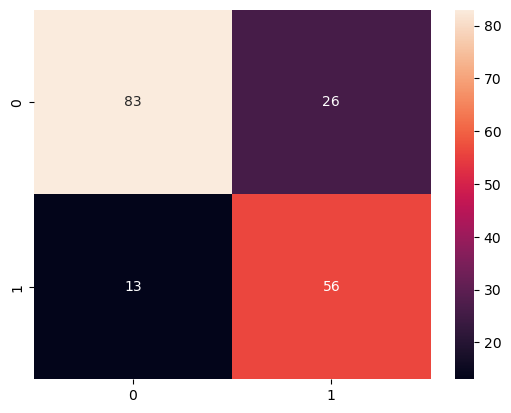

In [206]:
sns.heatmap(cm , annot=True)

In [207]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train , y_train)
model.score(X_test, y_test)

0.7808988764044944

In [208]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train , y_train)
model.score(X_test, y_test)

0.6292134831460674